In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score,LeaveOneOut,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/NIFTY-50 DATA.csv')
print("Dataset Preview")
df.head()

Dataset Preview


,Company,Open,Previous Close,Volume,Value (Lacs),VWAP,Beta,Mkt Cap (Rs. Cr.),High,Low,...,20D Avg Volume,20D Avg Delivery (%),Book Value Per Share,Dividend Yield,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Reliance Industries,1367,1364,12045916,164872.45,1369.56,1.18,1852189,1378.6,1362.7,...,9538459,52.58,605.55,0.40,NaN,NaN,NaN,NaN,NaN,NaN
1,HDFC Bank,952.7,951,25350832,244698.91,961.74,0.88,1482658,969.6,946,...,18603480,64.98,337.22,2.28,NaN,NaN,NaN,NaN,NaN,NaN
2,Bharti Airtel,1868,1878.4,5675393,105993.64,1866.9,0.91,1083241,1877,1855.9,...,4760082,62.36,150.17,0.86,NaN,NaN,NaN,NaN,NaN,NaN
3,TCS,2891,2888.4,1952902,56911.47,2897.26,0.92,1054383,2924.8,2866.6,...,2694522,60.89,261.89,4.32,NaN,NaN,NaN,NaN,NaN,NaN
4,ICICI Bank,1348,1348,20952632,287470.11,1368.92,1.09,980116,1379.4,1347.1,...,10999658,61.59,436.52,0.80,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(42, 27)

In [ ]:
#df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'], axis=1, inplace=True)

In [ ]:
#df.drop(['Dividend Yield'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Company,0
Open,0
Previous Close,0
Volume,0
Value (Lacs),0
VWAP,0
Beta,0
Mkt Cap (Rs. Cr.),0
High,0
Low,0


In [ ]:
df.dtypes

,0
Company,object
Open,object
Previous Close,object
Volume,object
Value (Lacs),object
VWAP,object
Beta,float64
Mkt Cap (Rs. Cr.),object
High,object
Low,object


In [ ]:
# Define Risk based on Beta
def risk_category(beta):
    if beta < 1:
        return "Low"
    elif beta <= 1:
        return "Medium"
    else:
        return "High"

df['Risk'] = df['Beta'].apply(risk_category)
df[['Company','Beta','Risk']].head()


,Company,Beta,Risk
0,Reliance Industries,1.18,High
1,HDFC Bank,0.88,Low
2,Bharti Airtel,0.91,Low
3,TCS,0.92,Low
4,ICICI Bank,1.09,High


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Company', 'Open', 'Previous Close', 'Volume', 'Value (Lacs)', 'VWAP',
       'Mkt Cap (Rs. Cr.)', 'High', 'Low', 'UC Limit', 'LC Limit', '52W High',
       '52W Low', 'All Time High', '20D Avg Volume', 'Book Value Per Share',
       'Risk'],
      dtype='object')

In [ ]:
obj = ['Open', 'Previous Close', 'Volume', 'Value (Lacs)', 'VWAP',
                        'Mkt Cap (Rs. Cr.)', 'High', 'Low', 'UC Limit', 'LC Limit',
                        '52W High', '52W Low', 'All Time High', '20D Avg Volume',
                        'Book Value Per Share']


In [ ]:
x=df.drop(columns=['Company','Risk','Beta'],axis=1)
y=df['Risk']

In [ ]:
# Clean and convert these columns to numeric
for col in obj:
    if col in x.columns: # Check if column exists in x after dropping
        x[col] = x[col].astype(str).str.replace(',', '', regex=False)
        x[col] = pd.to_numeric(x[col], errors='coerce')

In [ ]:
# Handle any remaining NaN values after conversion (e.g., fill with mean or median)
# For this example, I will fill with the mean of the column
for col in obj:
     if col in x.columns and x[col].isnull().any():
        mean_val = x[col].mean()
        x[col].fillna(mean_val, inplace=True)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
x_test.shape,y_test.shape

((9, 18), (9,))

In [ ]:
x_train.shape,y_train.shape

((33, 18), (33,))

In [ ]:
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)
log_reg.fit(x_train, y_train)


LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
y_pred_lr = log_reg.predict(x_test)



In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Logistic Regression Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

        High       0.50      0.60      0.55         5
         Low       0.33      0.25      0.29         4

    accuracy                           0.44         9
   macro avg       0.42      0.42      0.42         9
weighted avg       0.43      0.44      0.43         9



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

        High       0.83      1.00      0.91         5
         Low       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



In [ ]:
df.head()

,Company,Open,Previous Close,Volume,Value (Lacs),VWAP,Beta,Mkt Cap (Rs. Cr.),High,Low,...,LC Limit,52W High,52W Low,Face Value,All Time High,All Time Low,20D Avg Volume,20D Avg Delivery (%),Book Value Per Share,Risk
0,Reliance Industries,1367,1364,12045916,164872.45,1369.56,1.18,1852189,1378.6,1362.7,...,1227.6,1551,1114.85,10,1608.8,24.42,9538459,52.58,605.55,High
1,HDFC Bank,952.7,951,25350832,244698.91,961.74,0.88,1482658,969.6,946,...,855.9,1018.85,806.5,1,1018.85,7.85,18603480,64.98,337.22,Low
2,Bharti Airtel,1868,1878.4,5675393,105993.64,1866.9,0.91,1083241,1877,1855.9,...,1690.6,2045.8,1511,5,2045.8,9.31,4760082,62.36,150.17,Low
3,TCS,2891,2888.4,1952902,56911.47,2897.26,0.92,1054383,2924.8,2866.6,...,2599.6,4494.9,2866.6,1,4592.25,103.84,2694522,60.89,261.89,Low
4,ICICI Bank,1348,1348,20952632,287470.11,1368.92,1.09,980116,1379.4,1347.1,...,1213.2,1500,1186,2,1500,12.00,10999658,61.59,436.52,High


In [ ]:
x_train[0:5]

array([[-0.53773302, -0.53743697,  0.29922535, -0.51778474, -0.53872358,
        -0.2707742 , -0.53888172, -0.53839381, -0.53752092, -0.53733437,
        -0.55948901, -0.54056613,  0.14581222, -0.57253104, -0.44150269,
         0.11956839,  0.51349319, -0.26589076],
       [ 0.7650437 ,  0.76695467, -0.59447563, -0.5677822 ,  0.77401378,
        -0.57139078,  0.76722881,  0.77068794,  0.76696227,  0.76694511,
         0.63871085,  0.52753681, -0.91925095,  0.61546621, -0.50723098,
        -0.45406188,  0.00635135,  0.15589692],
       [-0.3849004 , -0.38564673, -0.21399167, -0.14551923, -0.38302861,
        -0.61709515, -0.38105539, -0.38468881, -0.38572514, -0.38552951,
        -0.28396345, -0.40332281,  1.47714118, -0.09838385, -0.34880703,
        -0.38081324,  0.15342248, -0.48644933],
       [ 2.50416024,  2.50656121, -0.58449714,  0.15369708,  2.49779956,
         0.25037404,  2.50048075,  2.50663006,  2.50655364,  2.50656987,
         2.27414443,  2.07028323,  0.14581222,  2.247

In [ ]:
!pip install yfinance

📊 Live price of RELIANCE.NS: ₹1375.00

📅 Last 5 entries of 1-month price data:
                                  Open         High          Low        Close  \
Date                                                                            
2025-09-30 00:00:00+05:30  1377.099976  1377.099976  1362.800049  1364.000000   
2025-10-01 00:00:00+05:30  1367.000000  1378.599976  1362.699951  1368.699951   
2025-10-02 00:00:00+05:30  1368.699951  1368.699951  1368.699951  1368.699951   
2025-10-03 00:00:00+05:30  1363.199951  1371.599976  1356.900024  1363.400024   
2025-10-06 00:00:00+05:30  1360.000000  1377.400024  1359.000000  1375.000000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-09-30 00:00:00+05:30  14604684        0.0           0.0  
2025-10-01 00:00:00+05:30  12045916        0.0           0.0  
2025-10-02 00:00:00+05:30         0        0.0           0.0  
2025-10-03 00:00:00+05:30  12842347   

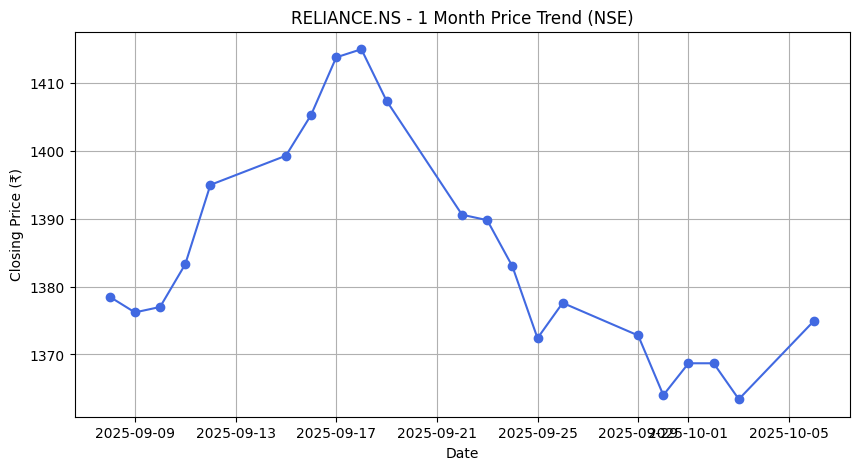

In [ ]:
!pip install yfinance --quiet
import yfinance as yf
import matplotlib.pyplot as plt

# Choose your NSE stock (add ".NS" at the end)
ticker = 'RELIANCE.NS'   # Example: Reliance Industries
stock = yf.Ticker(ticker)

# --- Live Price ---
hist = stock.history(period='1d')
live_price = hist['Close'].iloc[-1]
print(f"📊 Live price of {ticker}: ₹{live_price:.2f}")

# --- Historical Data (for analysis) ---
hist_data = stock.history(period='1mo', interval='1d')
print("\n📅 Last 5 entries of 1-month price data:")
print(hist_data.tail())

# --- Key Fundamentals ---
info = stock.info

beta = info.get('beta')
pe_ratio = info.get('trailingPE')
market_cap = info.get('marketCap')
dividend_yield = info.get('dividendYield')

print("\n🏦 Key Financial Metrics:")
print(f"• Beta: {beta}")
print(f"• P/E Ratio: {pe_ratio}")
print(f"• Market Cap: ₹{market_cap:,}" if market_cap else "• Market Cap: Data not available")
print(f"• Dividend Yield: {dividend_yield}")

# --- Visualization ---
plt.figure(figsize=(10,5))
plt.plot(hist_data.index, hist_data['Close'], marker='o', color='royalblue')
plt.title(f'{ticker} - 1 Month Price Trend (NSE)')
plt.xlabel('Date')
plt.ylabel('Closing Price (₹)')
plt.grid(True)
plt.show()
